In [1]:
import pandas as pd
import tarfile
from tqdm import tqdm 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [2]:
import cpi

In [3]:
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [4]:
def stringDegueuToList(string):
    index0 = 0
    index1 = 0
    liste = []
    nbCountries = string.count("/m")
    for i in range(nbCountries):
        index0 = string.index(": ", index0+1)
        try:
            index1 = string.index(", ", index0+1)
            liste.append(string[index0+3:index1-1])
        except:
            index1 = string.index("}", index0+1)
            liste.append(string[index0+3:index1-1])
    return liste

 The idea is to find the biggest differences between men and women roles and careers in cinema. Some of the questions to be answered could be the following.
 
-Are feminine characters **described differently** as the ones played by men? This question could be answered by using natural language processing and sentiment analysis on movie summaries.

-Are women **younger than men** in cinema (by movie type/period, movie revenue)? One hypothesis is typically that men characters are older than women in romantic movies.

-Is there a **difference in the career path taken men and women** actors? For example, do women get to play in high revenue movies earlier than men?
These questions are important because society impact movies and movies have an impact on society too. Seeing how male and female characters are depicted could get us some interesting intel on the state of society. As we have data for movies that came out at different times, we could also track how women roles in movies have evolved through time.


In [5]:
#tar = tarfile.open("MovieSummaries.tar.gz")
#tar.extractall()
#tar.close()

In [6]:
df = pd.read_table("./data/MovieSummaries/movie.metadata.tsv", header=None)
df.columns=["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", 
            "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]

In [7]:
df.sample(2)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
24176,6829851,/m/0grfdc,Polka-Dot Puss,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/0hqxf"": ""Famil..."
18977,21871251,/m/05n_y89,The Ashes,1965-09-25,NaN,234.0,"{""/m/05qqm"": ""Polish Language""}","{""/m/05qhw"": ""Poland""}","{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}"


In [8]:
df1 = pd.read_table("./data/MovieSummaries/tvtropes.clusters.txt", header=None)

In [9]:
df1.sample(10)

,0,1
112,corrupt_corporate_executive,"{""char"": ""Noah Cross"", ""movie"": ""Chinatown"", ""..."
65,byronic_hero,"{""char"": ""Travis Bickle"", ""movie"": ""Taxi Drive..."
350,master_swordsman,"{""char"": ""Inigo Montoya"", ""movie"": ""The Prince..."
69,byronic_hero,"{""char"": ""Cobb"", ""movie"": ""Inception"", ""id"": ""..."
429,slacker,"{""char"": ""John Winger"", ""movie"": ""Stripes"", ""i..."
53,bromantic_foil,"{""char"": ""Randal Graves"", ""movie"": ""Clerks II""..."
64,byronic_hero,"{""char"": ""James Bond"", ""movie"": ""Casino Royale..."
358,master_swordsman,"{""char"": ""He-Man"", ""movie"": ""Masters of the Un..."
473,tranquil_fury,"{""char"": ""Max Cady"", ""movie"": ""Cape Fear"", ""id..."
182,dirty_cop,"{""char"": ""The Lieutenant"", ""movie"": ""Bad Lieut..."


In [10]:
df2 = pd.read_table("./data/MovieSummaries/character.metadata.tsv", header=None)
df2.columns=["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "character name", "Actor date of birth", "Actor gender", 
            "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", 
            "Freebase character ID", "Freebase actor ID"]

In [11]:
df2.sort_values(by=["Actor name"]).head(20)

,Wikipedia movie ID,Freebase movie ID,Movie release date,character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
443911,22643388,/m/05znq3z,1922-08-04,NaN,1883-12-20,F,NaN,NaN,Cesarine Prinz\t,NaN,/m/0n1qm4g,NaN,/m/0m_f7mw
300061,22643470,/m/05zqsh4,1926-10-29,NaN,1883-12-20,F,NaN,NaN,Cesarine Prinz\t,NaN,/m/0n1df4k,NaN,/m/0m_f7mw
113180,20116200,/m/04yby6g,1998-11-05,Elias Riddler,1976-05-12,M,NaN,NaN,Daniel Newman,22.0,/m/09j1tjk,/m/0n4pjk3,/m/0n8vzn2
380192,15056534,/m/03h64m2,1911-05-25,NaN,NaN,M,NaN,NaN,'Big Bill' Giddinger,NaN,/m/0lt7r5k,NaN,/m/0lt7r5n
112577,23010798,/m/064j_6f,1973-07-25,Junkie in Casino,NaN,M,NaN,NaN,'Big' Lee,NaN,/m/0n1tc87,/m/0n1tcn4,/m/0n1tc8b
378588,1873017,/m/062rrj,1972-06-14,NaN,NaN,NaN,NaN,NaN,'Chicken' Holleman,NaN,/m/0gcg1gr,NaN,/m/0gc4cy_
276570,10050502,/m/02q05nf,1975,NaN,NaN,M,NaN,NaN,'Crazy George' Henderson,NaN,/m/0jsc3dw,NaN,/m/0jsc3dz
346471,3866200,/m/0b40yx,1991-03-18,Ronnie,NaN,NaN,NaN,NaN,'Evil' Ted Smith,NaN,/m/0h6dfjq,/m/0h6dfj3,/m/0h6dfj0
356950,31935934,/m/0dc2ctx,2010-08-07,Ovidiu,NaN,M,NaN,NaN,'Kecske' Molnár Levente,NaN,/m/0fq5m94,/m/0g4tsxd,/m/0fq5m86
81615,24051101,/m/07kd398,1943-05-28,Paj Mab's Guard #2,1903-11-28,M,NaN,NaN,'King Kong' Kashey,39.0,/m/0n637w5,/m/0n638tg,/m/0n637w8


In [12]:
df2.iloc[450664, 5]

'F'

In [13]:
df_madame = df2[df2["Actor gender"] == "F"]
df_madame = df_madame.drop_duplicates(subset=["Freebase actor ID"], keep = False)
print("Mean age of female actor at release date: " + str(df_madame["Actor age at movie release"].mean()))

Mean age of female actor at release date: 29.379171030974113


In [14]:
df_monsieur = df2[df2["Actor gender"] == "M"]
df_monsieur = df_monsieur.drop_duplicates(subset=["Freebase actor ID"], keep = False)
print("Mean age of male actor at release date: " + str(df_monsieur["Actor age at movie release"].mean()))

Mean age of male actor at release date: 36.539201118783325


In [15]:
df_plus = pd.DataFrame()

In [49]:
#Création du df utile pour les calculs
df_plus = pd.DataFrame(df2["Actor gender"])
df_plus["Actor name"] = df2["Actor name"]
df_plus = df_plus.dropna(subset=['Actor gender'])

df_plus["Actor age at release date"] = df2["Actor age at movie release"]
df_plus = df_plus.dropna(subset=['Actor age at release date'])

df_plus["Freebase movie ID"] = df2["Freebase movie ID"]
df_plus = pd.merge(df_plus, df[["Freebase movie ID", "Movie release date", "Movie box office revenue", "Movie countries", "Movie name", "Movie genres"]], on="Freebase movie ID")
#df_plus = df_plus.dropna(subset=['Movie box office revenue'])

#df_plus["Movie countries"] = df_plus["Movie countries"].apply(lambda x: stringDegueuToList(x))
df_plus['Movie countries'] = df_plus['Movie countries'].apply(lambda x: json.loads(x)) # Converts to dictionnary
df_plus['Movie countries'] = df_plus['Movie countries'].apply(lambda x: list(x.values()))
df_plus['Movie genres'] = df_plus['Movie genres'].apply(lambda x: json.loads(x)) # Converts to dictionnary
df_plus['Movie genres'] = df_plus['Movie genres'].apply(lambda x: list(x.values()))
#keep only US films
#df_plus = df_plus[df_plus["Movie countries"].str.contains("United States of America")]
df_plus["Movie release date"] = pd.to_datetime(df_plus["Movie release date"])
df_plus["Movie release date"] = df_plus["Movie release date"].dt.year

df_plus = df_plus.query("`Actor age at release date` > 0")
df_plus = df_plus.query("`Movie release date` > 1915")

df["Movie name"].apply(lambda x: x.lower())

#cpi.update()

#compute the box office revenue taking into account the inflation (converted to 2012)
df_plus["Real box office revenue (2012)"] = df_plus.apply(lambda x: cpi.inflate(x["Movie box office revenue"], x["Movie release date"], to=2012), axis=1)

In [84]:
df_plus.sample(10)

,Actor gender,Actor name,Actor age at release date,Freebase movie ID,Movie release date,Movie box office revenue,Movie countries,Movie name,Movie genres,Real box office revenue (2012)
166109,F,Shirley Knight,65.0,/m/05n_mt5,2001,NaN,[United States of America],desperate justice,"[Crime Fiction, Drama]",NaN
286848,M,Christopher Plummer,34.0,/m/0224yq,1964,NaN,[United States of America],the fall of the roman empire,"[Sword and Sandal, Historical fiction, Epic, P...",NaN
5500,M,Dan Aykroyd,43.0,/m/02f4wh,1996,9255027.0,[United States of America],celtic pride,"[Sports, Comedy, Slapstick]",1.354301e+07
170078,M,Noel Purcell,62.0,/m/0bhb92p,1963,NaN,[United Kingdom],nurse on wheels,"[Romantic comedy, Romance Film, Comedy]",NaN
251184,F,Lisa Gastoni,21.0,/m/05mrwgr,1956,NaN,"[England, United Kingdom]",three men in a boat,"[Romance Film, Comedy, Animation]",NaN
118265,M,Lino Toffolo,41.0,/m/05q9v1k,1976,NaN,[Italy],lunatics and lovers,[Comedy],NaN
199276,M,Burton Gilliam,43.0,/m/0dgkrjx,1982,NaN,[United States of America],foxfire light,"[Romantic drama, Period piece, Drama, Romance ...",NaN
121162,F,Wendy Barrie,27.0,/m/09n_zx,1939,721000.0,[United States of America],five came back,"[Adventure, Black-and-white, Drama, Disaster, ...",1.190916e+07
66151,F,Juliette Lewis,22.0,/m/04tzz5,1995,7959291.0,[United States of America],strange days,"[Crime Fiction, Thriller, Science Fiction, Fut...",1.199085e+07
813,M,Gerard Butler,42.0,/m/0hhggp1,2012,2200000.0,[United States of America],chasing mavericks,"[Sports, Drama]",2.200000e+06


In [18]:
print("Moyenne d'age des femmes: " +str(df_plus[df_plus["Actor gender"] == "F"]["Actor age at release date"].mean()) + "\n" + 
      "Nombre de femmes: " + str(len(pd.unique(df_plus[df_plus["Actor gender"] == "F"]["Actor name"]))))

Moyenne d'age des femmes: 34.542108283910466
Nombre de femmes: 7935


In [19]:
print("Moyenne d'age d'hommes: " +str(df_plus[df_plus["Actor gender"] == "M"]["Actor age at release date"].mean()) + "\n" + 
      "Nombre d'hommes: " + str(len(pd.unique(df_plus[df_plus["Actor gender"] == "M"]["Actor name"]))))

Moyenne d'age d'hommes: 40.82237185704693
Nombre d'hommes: 13837


In [20]:
#age moyen des hommes et femmes dans les films à succès
df_success_movie = df_plus.query("`Real box office revenue (2012)` > 2e9")
print("Films a succès:\nAges des hommes: " + str(round(df_success_movie[df_success_movie["Actor gender"] == "M"]["Actor age at release date"].mean(), 1)) + 
      "\nAge des femmes: " + str(round(df_success_movie[df_success_movie["Actor gender"] == "F"]["Actor age at release date"].mean(), 1)))

Films a succès:
Ages des hommes: 37.5
Age des femmes: 32.3


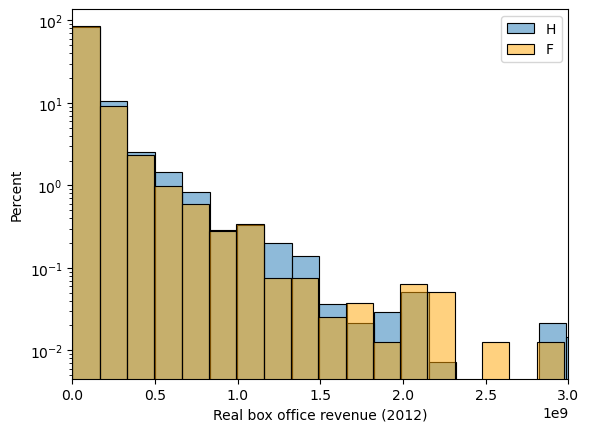

In [21]:
#Ici je plot pour chaque acteur la moyenne du box office revenue, et je compare les moyennes pour toutes les femmes et hommes. 
df_plusH = df_plus[df_plus["Actor gender"] == "M"]
df_plusF = df_plus[df_plus["Actor gender"] == "F"]
bins_nb = 40
fig = sns.histplot(df_plusH.groupby(by="Actor name")["Real box office revenue (2012)"].mean(), stat="percent", bins = bins_nb, alpha=0.5)
sns.histplot(df_plusF.groupby(by="Actor name")["Real box office revenue (2012)"].mean(), stat="percent", bins = bins_nb, alpha=0.5, color="orange")
fig.set(xlim=(0, 3e9))
fig.legend(["H", "F"])
fig.set_yscale("log")

In [22]:
stats_by_year_men = df_plusH.groupby(df_plusH['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

stats_by_year_women = df_plusF.groupby(df_plusF['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

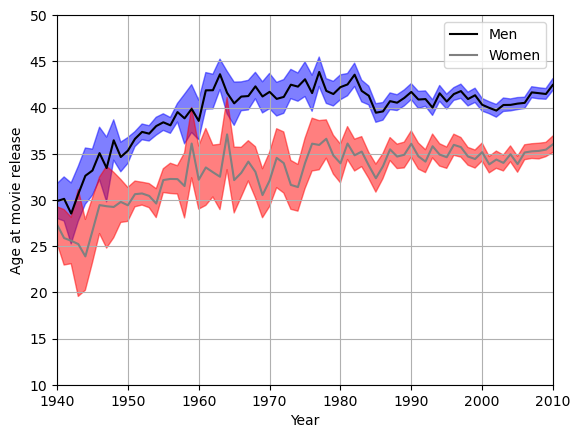

In [23]:
plt.fill_between(stats_by_year_men.index, stats_by_year_men.lower_err_age,
                 stats_by_year_men.upper_err_age, alpha = 0.5, color = 'blue')
plt.plot(stats_by_year_men.average_age, color = 'black', label = "Men")

plt.fill_between(stats_by_year_women.index, stats_by_year_women.lower_err_age,
                 stats_by_year_women.upper_err_age, alpha = 0.5, color = 'red')
plt.plot(stats_by_year_women.average_age, color = 'grey', label="Women")

plt.xlabel('Year')
plt.xlim(1940,2010)
plt.ylim(10,50)
plt.grid()
plt.ylabel('Age at movie release')
plt.legend()

In [73]:
df_plusUS = df_plus[df_plus["Movie countries"].apply(lambda x: "United States of America" in x)]
df_plusEU = df_plus[df_plus["Movie countries"].apply(lambda x: "France" in x or "Italy" in x or "German" in x or "Austria" in x 
                                                     or "United Kingdom" in x or "Spain" in x or "Netherlands" in x or "Poland" in x)]
df_plusIN = df_plus[df_plus["Movie countries"].apply(lambda x: "India" in x)]

In [74]:
print(str(df_plusUS.shape) + "|" + str(df_plusEU.shape)+ "|" + str(df_plusIN.shape))

(166638, 10)|(60057, 10)|(31968, 10)


In [54]:
df_plusUSmen = df_plusUS[df_plusUS["Actor gender"] == "M"]
df_plusUSwomen = df_plusUS[df_plusUS["Actor gender"] == "F"]

df_plusEUmen = df_plusEU[df_plusEU["Actor gender"] == "M"]
df_plusEUwomen = df_plusEU[df_plusEU["Actor gender"] == "F"]

df_plusINmen = df_plusIN[df_plusIN["Actor gender"] == "M"]
df_plusINwomen = df_plusIN[df_plusIN["Actor gender"] == "F"]

**US**

In [38]:
stats_by_year_menUS = df_plusUSmen.groupby(df_plusUSmen['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

stats_by_year_womenUS = df_plusUSwomen.groupby(df_plusUSwomen['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

Text(0.5, 1.0, 'US')

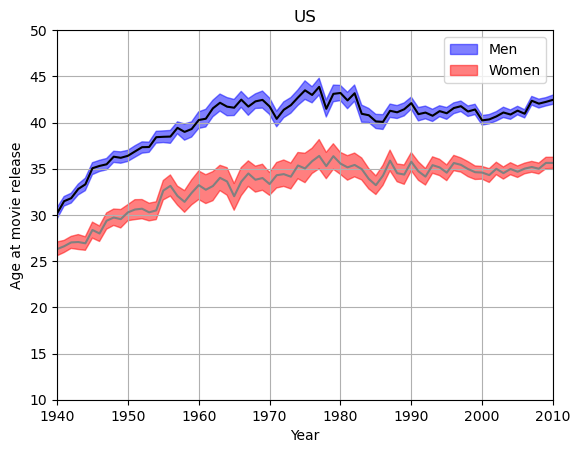

In [39]:
plt.fill_between(stats_by_year_menUS.index, stats_by_year_menUS.lower_err_age,
                 stats_by_year_menUS.upper_err_age, alpha = 0.5, color = 'blue', label = "Men")
plt.plot(stats_by_year_menUS.average_age, color = 'black')

plt.fill_between(stats_by_year_womenUS.index, stats_by_year_womenUS.lower_err_age,
                 stats_by_year_womenUS.upper_err_age, alpha = 0.5, color = 'red', label="Women")
plt.plot(stats_by_year_womenUS.average_age, color = 'grey')

plt.xlabel('Year')
plt.xlim(1940,2010)
plt.ylim(10,50)
plt.grid()
plt.ylabel('Age at movie release')
plt.legend()
plt.title("US")

**Europe**

In [85]:
stats_by_year_menEU = df_plusEUmen.groupby(df_plusEUmen['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

stats_by_year_womenEU = df_plusEUwomen.groupby(df_plusEUwomen['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

Text(0.5, 1.0, 'Europe')

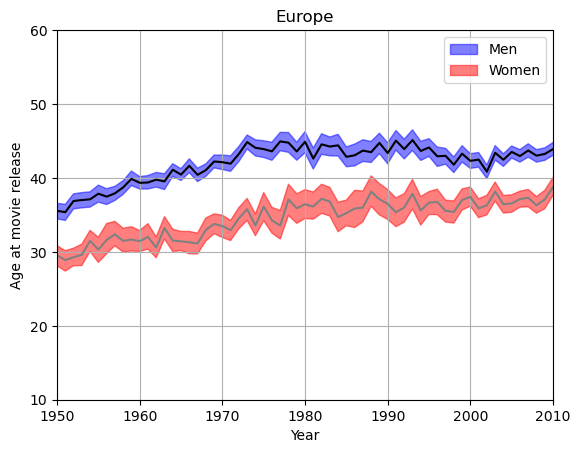

In [86]:
plt.fill_between(stats_by_year_menEU.index, stats_by_year_menEU.lower_err_age,
                 stats_by_year_menEU.upper_err_age, alpha = 0.5, color = 'blue', label = "Men")
plt.plot(stats_by_year_menEU.average_age, color = 'black')

plt.fill_between(stats_by_year_womenEU.index, stats_by_year_womenEU.lower_err_age,
                 stats_by_year_womenEU.upper_err_age, alpha = 0.5, color = 'red', label="Women")
plt.plot(stats_by_year_womenEU.average_age, color = 'grey')

plt.xlabel('Year')
plt.xlim(1950,2010)
plt.ylim(10,60)
plt.grid()
plt.ylabel('Age at movie release')
plt.legend()
plt.title("Europe")

**India**

In [42]:
stats_by_year_menIN = df_plusINmen.groupby(df_plusINmen['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

stats_by_year_womenIN = df_plusINwomen.groupby(df_plusINwomen['Movie release date']).apply(lambda x: pd.Series({
        'average_age': x['Actor age at release date'].mean(),
        'lower_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[0],
        'upper_err_age': bootstrap_CI(x['Actor age at release date'], 1000)[1]
    }))

Text(0.5, 1.0, 'India')

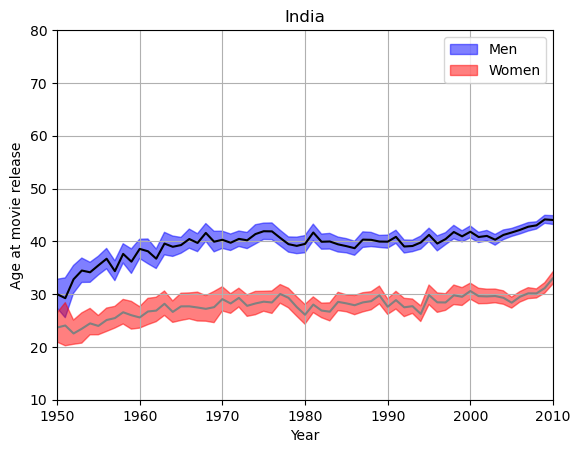

In [46]:
plt.fill_between(stats_by_year_menIN.index, stats_by_year_menIN.lower_err_age,
                 stats_by_year_menIN.upper_err_age, alpha = 0.5, color = 'blue', label = "Men")
plt.plot(stats_by_year_menIN.average_age, color = 'black')

plt.fill_between(stats_by_year_womenIN.index, stats_by_year_womenIN.lower_err_age,
                 stats_by_year_womenIN.upper_err_age, alpha = 0.5, color = 'red', label="Women")
plt.plot(stats_by_year_womenIN.average_age, color = 'grey')

plt.xlabel('Year')
plt.xlim(1950,2010)
plt.ylim(10,80)
plt.grid()
plt.ylabel('Age at movie release')
plt.legend()
plt.title("India")